In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os

from sklearn import manifold
from sklearn.manifold import TSNE
from time import time

PATH = "features/"
SAMPLE = None
TSNE_FOLDER = "tsne/"
TSNE_VIZ_FOLDER = "tsne_viz15/"
TSNE_TRAINTEST = "tsne_traintest/"

perplexities = [5, 15, 30, 50, 100]

datasets = ['train', 'test']
method_dict = {'base' : 'Cross Entropy',
#                'ce_ent_' : 'Cross Entropy / Entropy',
               'kld' : 'Cross Entropy / KLD',
               'ce_kg' : 'Graph Rejection',
#                'random_mix_' : 'RandomMix',
#                'dividehmm_' : "DivideHMM",
              }
fullnames = [val for key, val in method_dict.items()]
keywords = [key for key, val in method_dict.items()]

def load_files(filepath):
    data_filename = glob.glob(filepath + "data*")
    label_filename = glob.glob(filepath + "clean_label*")
    label_filename.extend(glob.glob(filepath + "test_label*"))
    noise_label_filename = glob.glob(filepath + "noisy_label*")
    
    print(data_filename, label_filename, noise_label_filename)

    data = np.load(data_filename[0])[:SAMPLE]
    label = np.load(label_filename[0])[:SAMPLE]

    # get noise label and noise
    if len(noise_label_filename) > 0:
        noise_label = np.load(noise_label_filename[0])[:SAMPLE]
        # True if is noise
        noise = (noise_label != label)
    else:
        noise_label = None
        noise = None
        
    return data, label, noise_label, noise

## Generate tsne pny

In [116]:
for keyword in keywords: # method
    for dataset in datasets: # train or test
        filepath = PATH + "*" + keyword + "*" + dataset + "*"
        
        data, label, noise_label, noise = load_files(filepath)
            
        # fit tsne
        for i, perplexity in enumerate(perplexities): # perplexity
            filename = TSNE_FOLDER + keyword + "_" + dataset + "_" + str(perplexity) + "_tsne.npy"
#             print(filename)
            
            if not os.path.isfile(filename):# check npy exists
                print("Generating tsne for ", filename)
                X_embedded = TSNE(n_components=2, init='random', perplexity=perplexity).fit_transform(data)
                np.save(filename, X_embedded)

['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_5_tsne.npy
tsne/base_train_15_tsne.npy
tsne/base_train_30_tsne.npy
tsne/base_train_50_tsne.npy
tsne/base_train_100_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []
tsne/base_test_5_tsne.npy
tsne/base_test_15_tsne.npy
tsne/base_test_30_tsne.npy
tsne/base_test_50_tsne.npy
tsne/base_test_100_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_5_tsne.npy
tsne/kld_train_15_tsne.npy
tsne/kld_train_30_tsne.npy
tsne/kld_train_50_tsne.npy
tsne/kld_train_100_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_test_5_tsne.npy
tsne/kld_test_15_tsne.npy
tsne/kld_test_30_tsne.npy
tsne/kld_te

## Plot scatterplot

tsne/base_train_5_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_15_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_30_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_50_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_100_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']


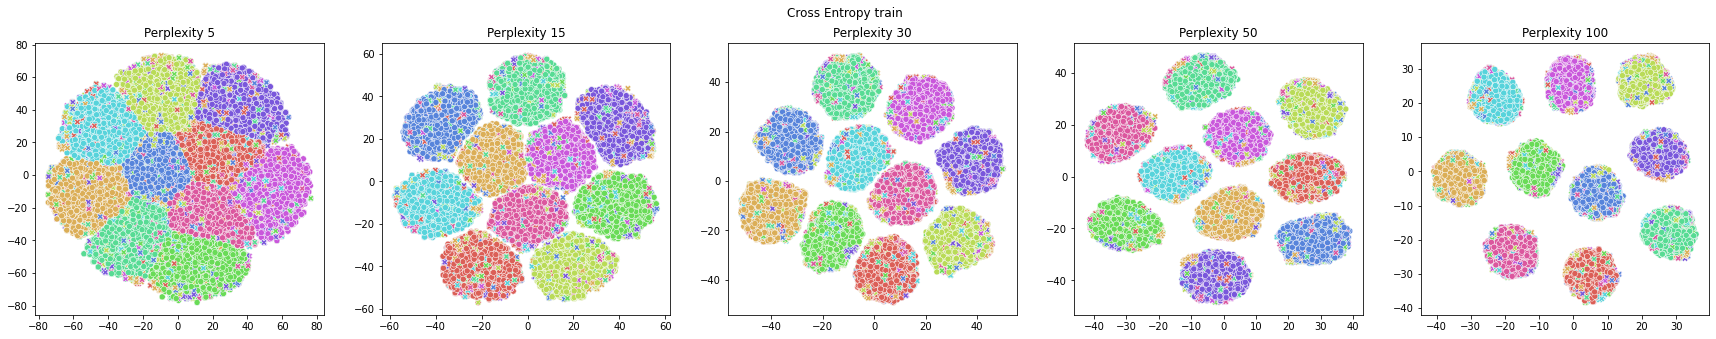

tsne/base_test_5_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []
tsne/base_test_15_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []
tsne/base_test_30_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []
tsne/base_test_50_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []
tsne/base_test_100_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10_0.2_test_test_label.npy'] []


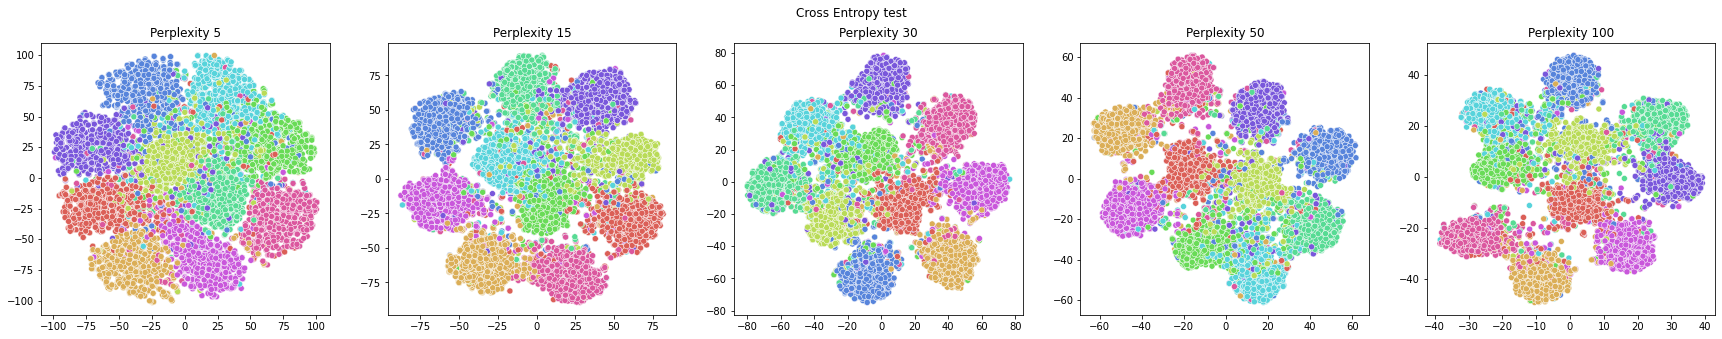

tsne/kld_train_5_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_15_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_30_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_50_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_100_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']


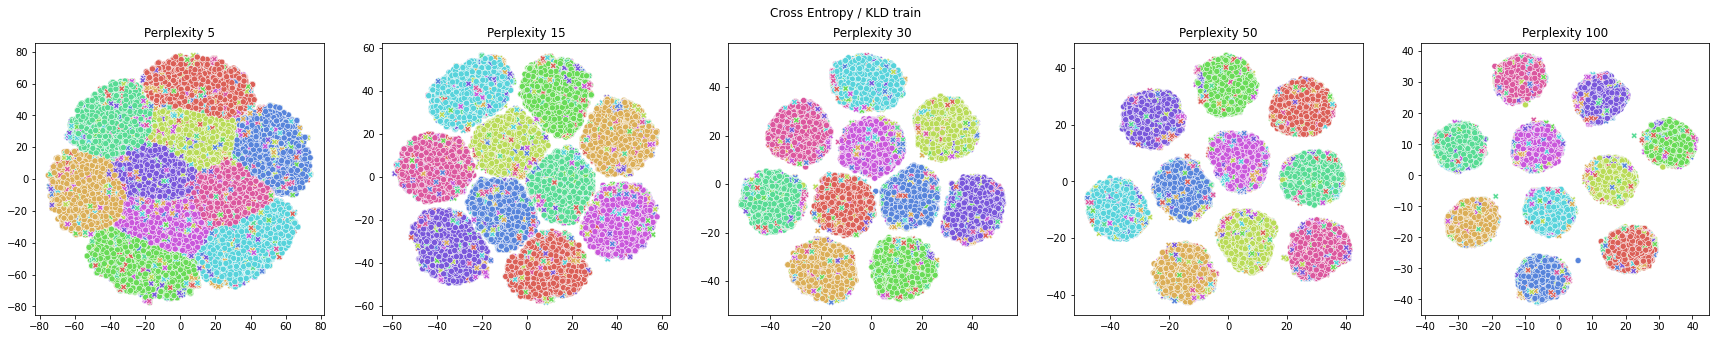

tsne/kld_test_5_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_test_15_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_test_30_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_test_50_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_test_100_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []


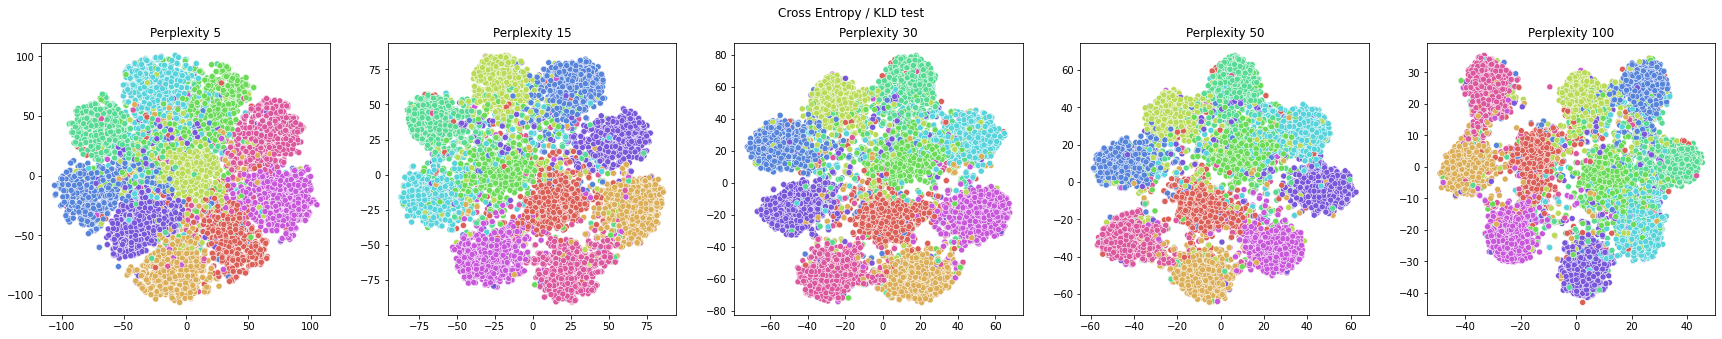

tsne/ce_kg_train_5_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_15_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_30_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_50_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_100_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']


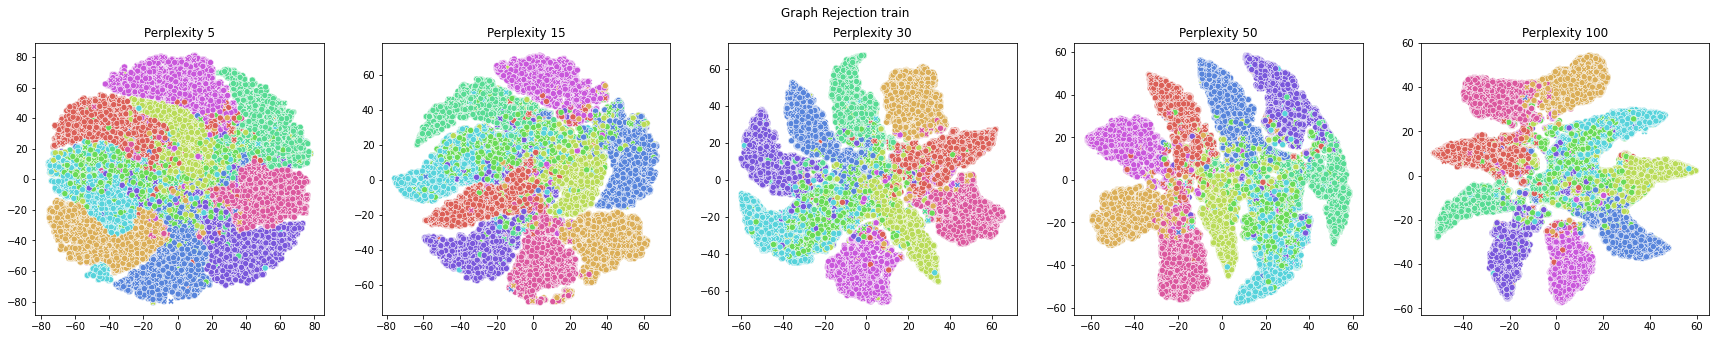

tsne/ce_kg_test_5_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_cifar10_0.2_test_test_label.npy'] []
tsne/ce_kg_test_15_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_cifar10_0.2_test_test_label.npy'] []
tsne/ce_kg_test_30_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_cifar10_0.2_test_test_label.npy'] []
tsne/ce_kg_test_50_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_cifar10_0.2_test_test_label.npy'] []
tsne/ce_kg_test_100_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_cifar10_0.2_test_test_label.npy'] []


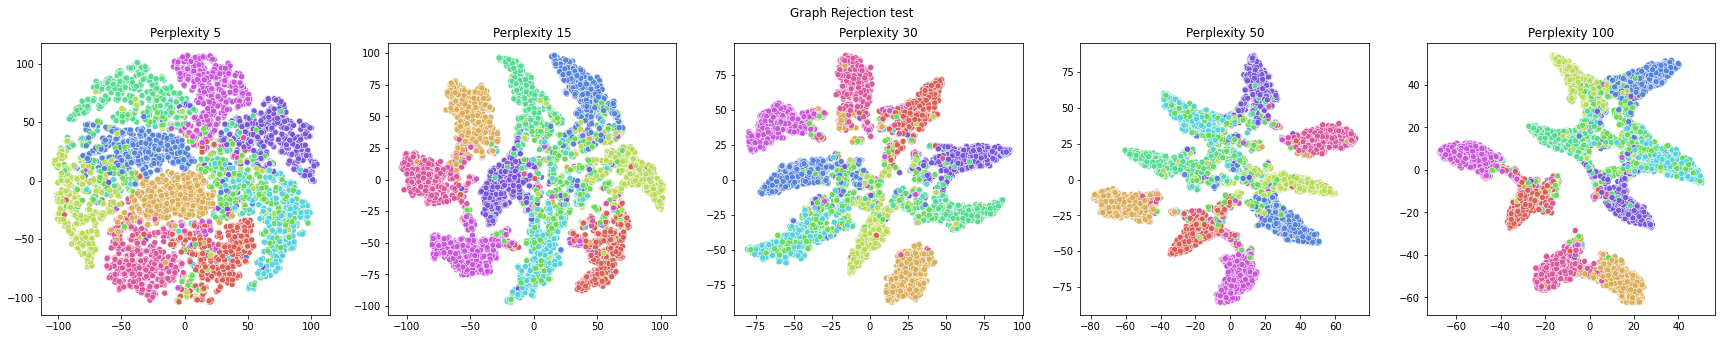

In [6]:
for keyword in keywords: # method
    for dataset in datasets: # train or test
        
        # plot scatter
        fig, axs = plt.subplots(ncols=len(perplexities), figsize=(30,5)) #22,5
        
        for i, perplexity in enumerate(perplexities): # perplexity
            filename = TSNE_FOLDER + keyword + "_" + dataset + "_" + str(perplexity) + "_tsne.npy"
            if os.path.isfile(filename):# check npy exists
                X_embedded = np.load(filename)
                print(filename)
            else:
                print(filename + " not exists")
                
            filepath = PATH + "*" + keyword + "*" + dataset + "*"
            data, label, noise_label, noise = load_files(filepath)
            
            columns = ['d1', 'd2', 'label']
            df = pd.DataFrame(np.hstack((X_embedded, label.reshape(-1,1))), columns=columns)
            if noise is not None:
                df['noise'] = pd.Series(noise)
                sns.scatterplot(
                    x="d1", y="d2",
                    hue='label',
                    style="noise",
                    palette=sns.color_palette("hls", len(df['label'].unique())),
                    data=df,
                    legend=False,
                    ax=axs[i]
                )
            else:
                sns.scatterplot(
                    x="d1", y="d2",
                    hue='label',
                    palette=sns.color_palette("hls", len(df['label'].unique())),
                    data=df,
                    legend=False,
                    ax=axs[i]
                )

            axs[i].set_xlabel(None)
            axs[i].set_ylabel(None)
#             axs[i].set_xticks([])
#             axs[i].set_yticks([])
            axs[i].set_title("Perplexity " + str(perplexity))
    
        fig.suptitle(method_dict[keyword] + " " + dataset)
        plt.savefig(TSNE_VIZ_FOLDER + keyword + "_" + dataset + "_" + "tsne.png", dpi=300, transparent=False, bbox_inches='tight', facecolor='white')
        plt.show()

## Train Test

tsne/base_train_5_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_15_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_30_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_50_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_train_100_tsne.npy
['features/base2_cifar10_0.2_train_data.npy'] ['features/base2_cifar10_0.2_train_clean_label.npy'] ['features/base2_cifar10_0.2_train_noisy_label.npy']
tsne/base_test_5_tsne.npy
['features/base2_cifar10_0.2_test_test_data.npy'] ['features/base2_cifar10

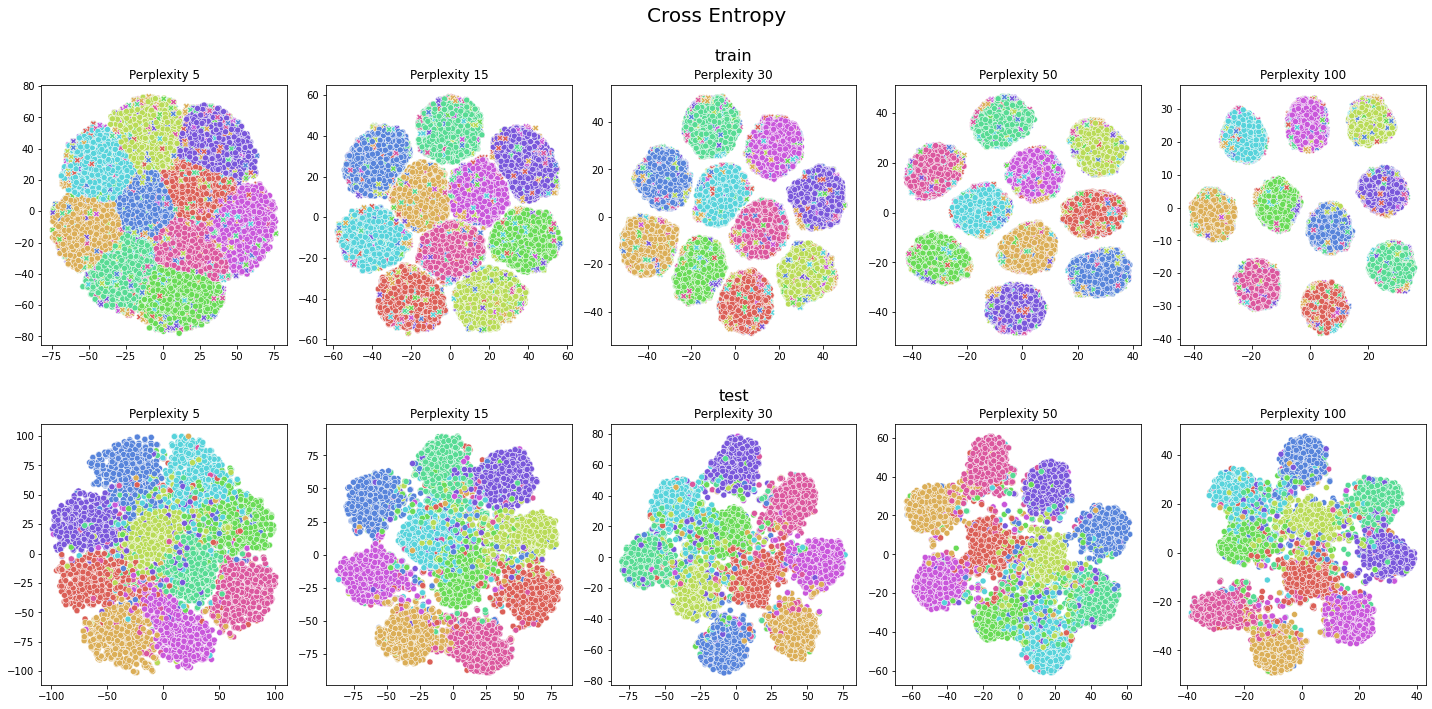

tsne/kld_train_5_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_15_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_30_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_50_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_train_100_tsne.npy
['features/kld_cifar10_0.2_train_data.npy'] ['features/kld_cifar10_0.2_train_clean_label.npy'] ['features/kld_cifar10_0.2_train_noisy_label.npy']
tsne/kld_test_5_tsne.npy
['features/kld_cifar10_0.2_test_test_data.npy'] ['features/kld_cifar10_0.2_test_test_label.npy'] []
tsne/kld_t

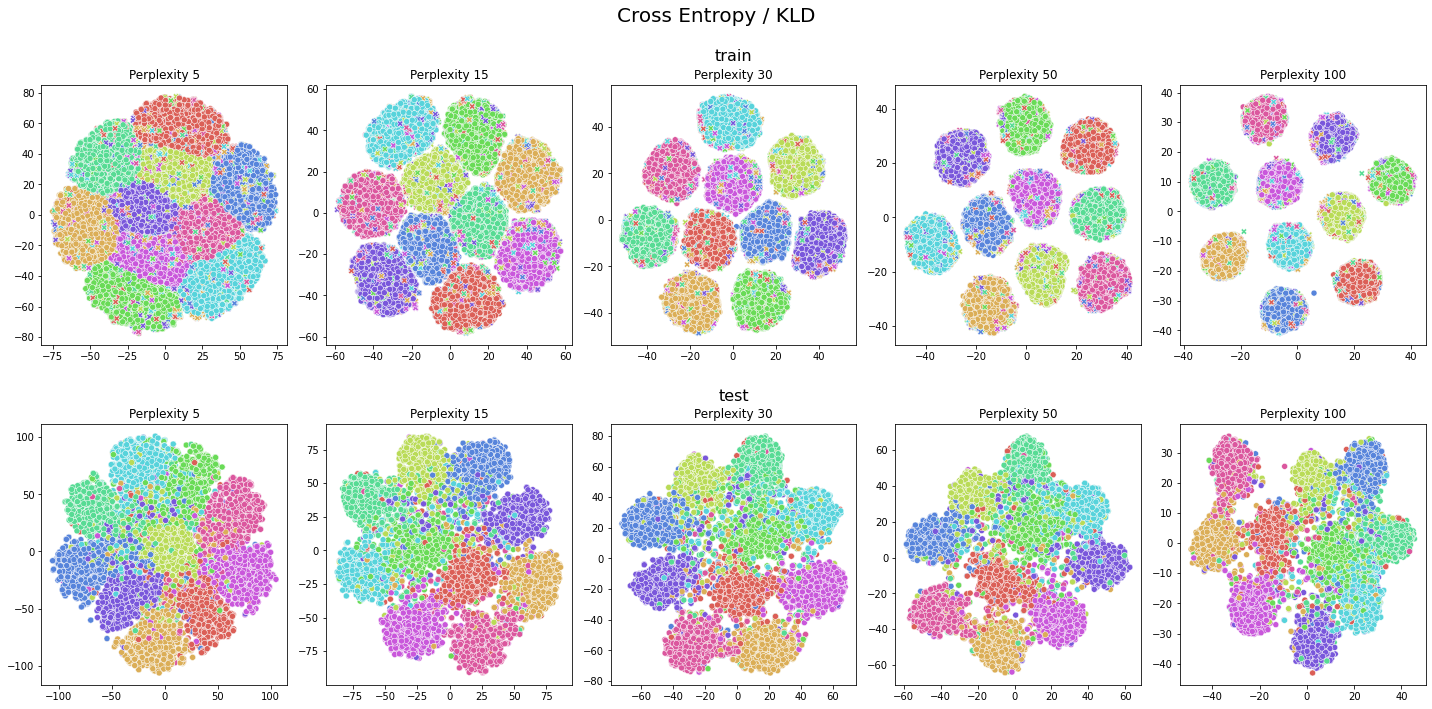

tsne/ce_kg_train_5_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_15_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_30_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_50_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_train_100_tsne.npy
['features/ce_kg_cifar10_0.2_train_data.npy'] ['features/ce_kg_cifar10_0.2_train_clean_label.npy'] ['features/ce_kg_cifar10_0.2_train_noisy_label.npy']
tsne/ce_kg_test_5_tsne.npy
['features/ce_kg_cifar10_0.2_test_test_data.npy'] ['features/ce_kg_c

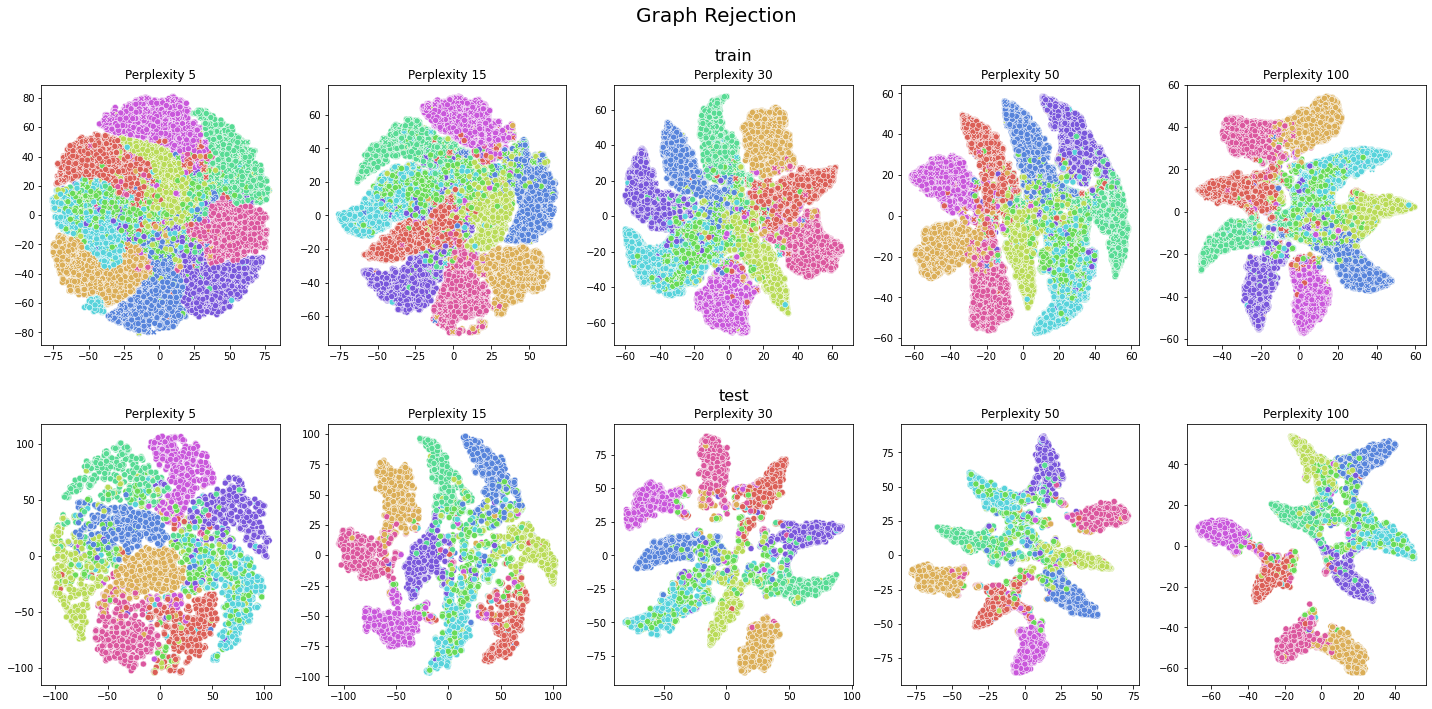

In [68]:
for keyword in keywords: # method
    
    # plot scatter
    fig, axs = plt.subplots(nrows=len(datasets), ncols=1, figsize=(20,10)) #5:20,10
    
    for j, dataset in enumerate(datasets): # train or test
        
        axs[j].set_title(dataset + "\n", fontsize=16)
        axs[j].axis('off')
        axs[j]._frameon = False

        
        for i, perplexity in enumerate(perplexities): # perplexity
            ax = fig.add_subplot(len(datasets),len(perplexities),i+1+j*len(perplexities))
            
            filename = TSNE_FOLDER + keyword + "_" + dataset + "_" + str(perplexity) + "_tsne.npy"
            if os.path.isfile(filename):# check npy exists
                X_embedded = np.load(filename)
                print(filename)
            else:
                print(filename + " not exists")
                
            filepath = PATH + "*" + keyword + "*" + dataset + "*"
            data, label, noise_label, noise = load_files(filepath)
            
            columns = ['d1', 'd2', 'label']
            df = pd.DataFrame(np.hstack((X_embedded, label.reshape(-1,1))), columns=columns)
            if noise is not None:
                df['noise'] = pd.Series(noise)
                sns.scatterplot(
                    x="d1", y="d2",
                    hue='label',
                    style="noise",
                    palette=sns.color_palette("hls", len(df['label'].unique())),
                    data=df,
                    legend=False,
                    ax=ax
                )
            else:
                sns.scatterplot(
                    x="d1", y="d2",
                    hue='label',
                    palette=sns.color_palette("hls", len(df['label'].unique())),
                    data=df,
                    legend=False,
                    ax=ax
                )

            ax.set_xlabel(None)
            ax.set_ylabel(None)
#             axs[i].set_xticks([])
#             axs[i].set_yticks([])
            ax.set_title("Perplexity " + str(perplexity))
    
    fig.suptitle(method_dict[keyword], fontsize=20)
    plt.tight_layout()
    plt.savefig(TSNE_TRAINTEST + keyword + "_" + "tsne.png", dpi=300, transparent=False, bbox_inches='tight', facecolor='white')
    plt.show()